In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

/Users/abhishekperiwal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("../input/fordTrain.csv")
test = pd.read_csv("../input/fordTest.csv")

In [3]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [4]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [5]:
from sklearn.model_selection import train_test_split

In [13]:
train_df, val_df = train_test_split(train.drop(columns=['TrialID','ObsNum']), test_size=0.25, random_state=42)

In [14]:
x_train = train_df.loc[:, train_df.columns != 'IsAlert']
x_val = val_df.loc[:, val_df.columns != 'IsAlert']
y_train = train_df.loc[:, train_df.columns == 'IsAlert']
y_val = val_df.loc[:, val_df.columns == 'IsAlert']

In [45]:
parameters = {'booster':'gbtree',
                  'objective':'binary:logistic',
                  'learning_rate': 0.055,
                  'max_depth': 10,
                  'min_child_weight': 1,
                  'subsample': 0.5,
                  'colsample_bytree': 0.4,
                  'reg_aplpha': 0.1,
                  'reg_lambda': 200,
                  'eval_metric':'auc',
                  'seed': 79}
xg_train = xgb.DMatrix(x_train, label=y_train)
xg_val = xgb.DMatrix(x_val, label=y_val)

In [46]:
xgb_reg = xgb.train(parameters, xg_train, 150, verbose_eval=1)

In [47]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, xgb_reg.predict(xg_train))
print("train AUC : ",metrics.auc(fpr_train, tpr_train))
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, xgb_reg.predict(xg_val))
print("val AUC : ",metrics.auc(fpr_val, tpr_val))

train AUC :  0.9737859558146493
val AUC :  0.9725303666724909


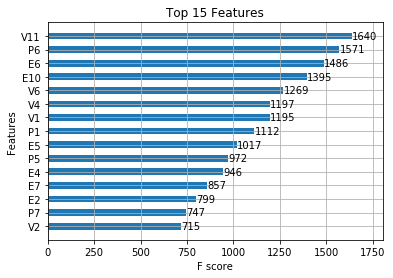

In [38]:
xgb.plot_importance(booster=xgb_reg, height=0.5, xlabel='F score', max_num_features=15, title='Top 15 Features')